### Diagnostic plots for the three noise assumptions in linear regression:
 1. noise is normally distributed -> QQ plot
 2. noise variance is constant -> residuals vs fitted
 3. noise is independent -> residual i vs residual i+1 (for serial correlation)

[R kernel for Jupyter Notebook](https://irkernel.github.io/)

In [1]:
#lme4SleepStudy.R
# Linear regression example from lme4 package
# see Bates "LME4 Mixed Effects Modeling with R" 2010, chapter 4
# Version 0.2, 5 December 2017 by Tjeerd Dijkstra
# Tested with R 3.4 under OS X 10.11.6 on an i7-4980HQ@2.8GHz

library(lme4); library(ggplot2); library(tibble); library(dplyr)

Loading required package: Matrix

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Call:
lm(formula = Reaction ~ Days, data = sleepstudy)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.848  -27.483    1.546   26.142  139.953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  251.405      6.610  38.033  < 2e-16 ***
Days          10.467      1.238   8.454 9.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.71 on 178 degrees of freedom
Multiple R-squared:  0.2865,	Adjusted R-squared:  0.2825 
F-statistic: 71.46 on 1 and 178 DF,  p-value: 9.894e-15



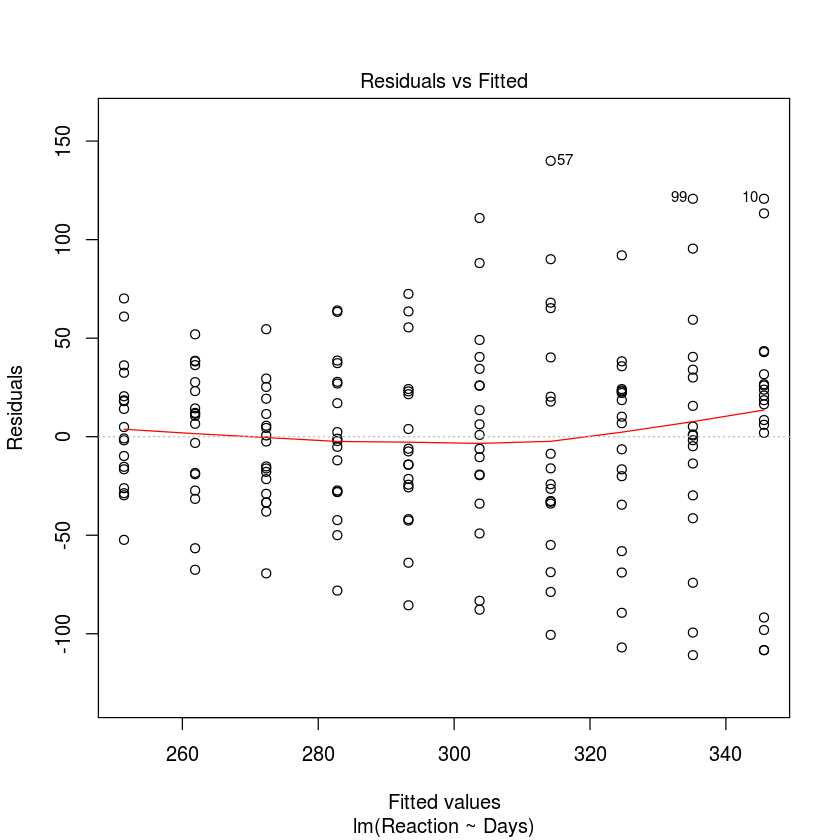

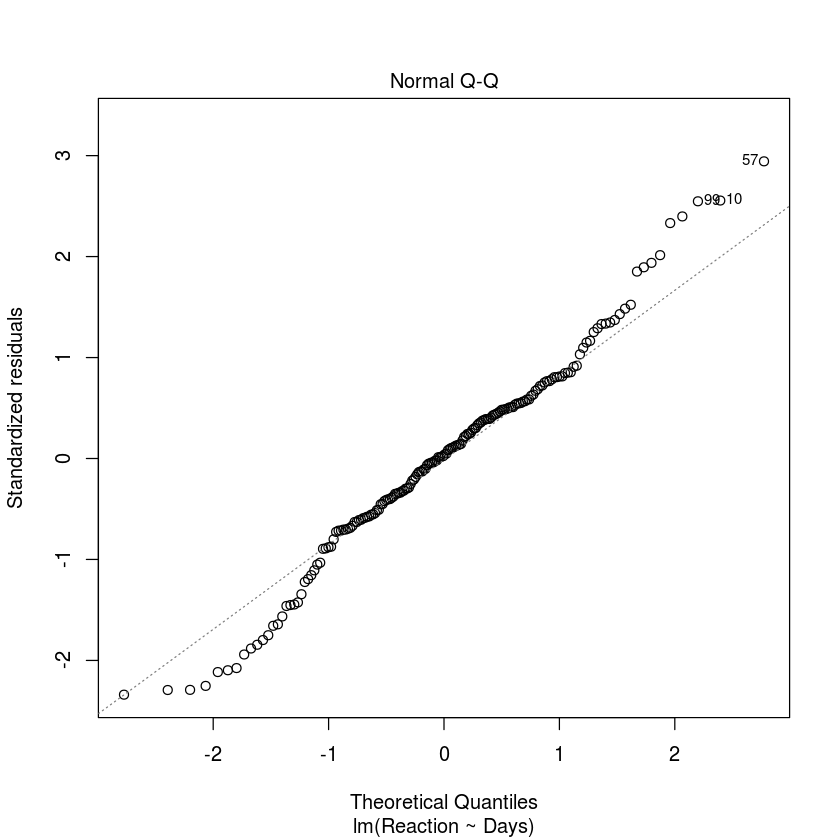

In [2]:
# The average reaction time per day for subjects in a sleep deprivation study.
# On day 0 the subjects had their normal amount of sleep. Starting that night
# they were restricted to 3 hours of sleep per night. The observations represent
# the average reaction time on a series of tests given each day to each subject.
# data on 18 participant for 10 days each
data(sleepstudy)

## linear regression
lm.out <- lm(Reaction ~ Days , data = sleepstudy)
print(summary(lm.out))
# plot.lm() directly plots diagnostic plots from lm.out
# both QQ plot and residuals vs predicted
plot(lm.out, c(2, 1), ask = FALSE)
# neither plot is any cause for concern

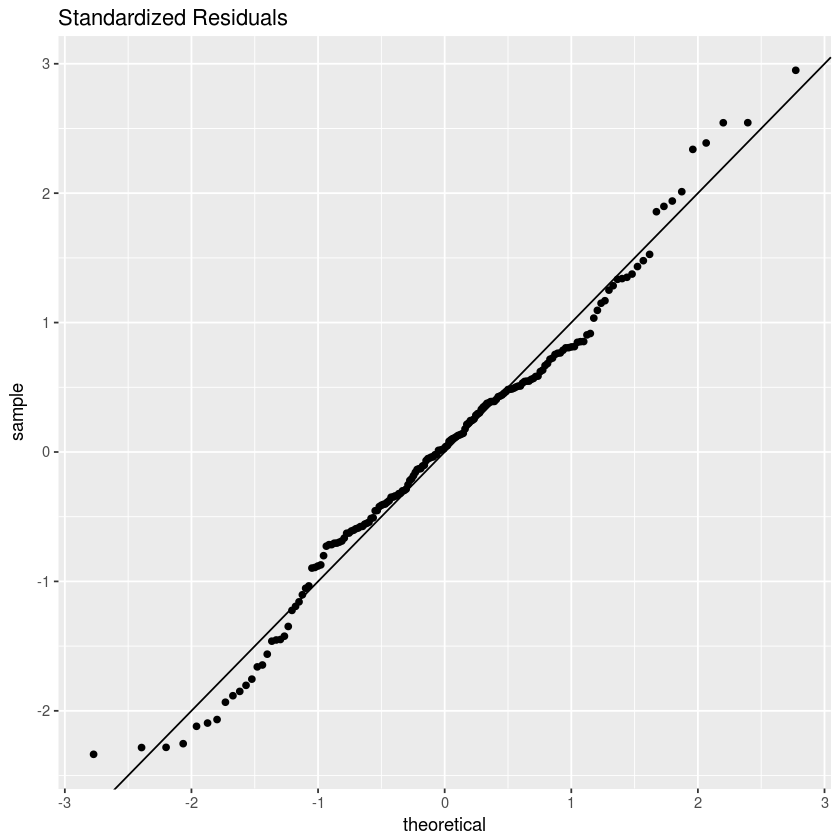

In [3]:
## for nicer plots and more insight I make the same plots with ggplot
# a tibble is a modern version of a data.frame
Y.plot <- tibble(Days = sleepstudy$Days, Fitted = fitted(lm.out), Residuals = resid(lm.out))

# QQ-plot
# print(ggplot(Y.plot, aes(sample = Residuals)) +
#         geom_qq() + labs(title = "Raw Residuals"))

# standardize the residuals for a nicer QQ-plot (I can add a diagonal line to guide the eye)
RMSE <- sqrt(mean(resid(lm.out)^2))
Y.plot <- mutate(Y.plot, StandardizedResiduals = resid(lm.out)/RMSE)
print(ggplot(Y.plot, aes(sample = StandardizedResiduals)) +
        geom_qq() + geom_abline(slope = 1) + labs(title = "Standardized Residuals"))

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


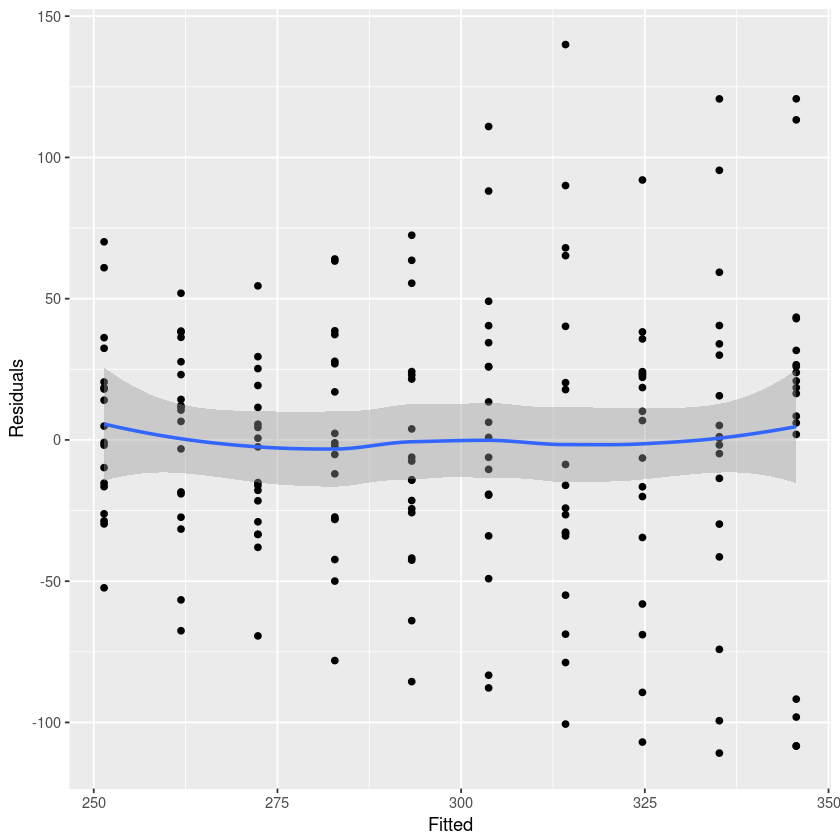

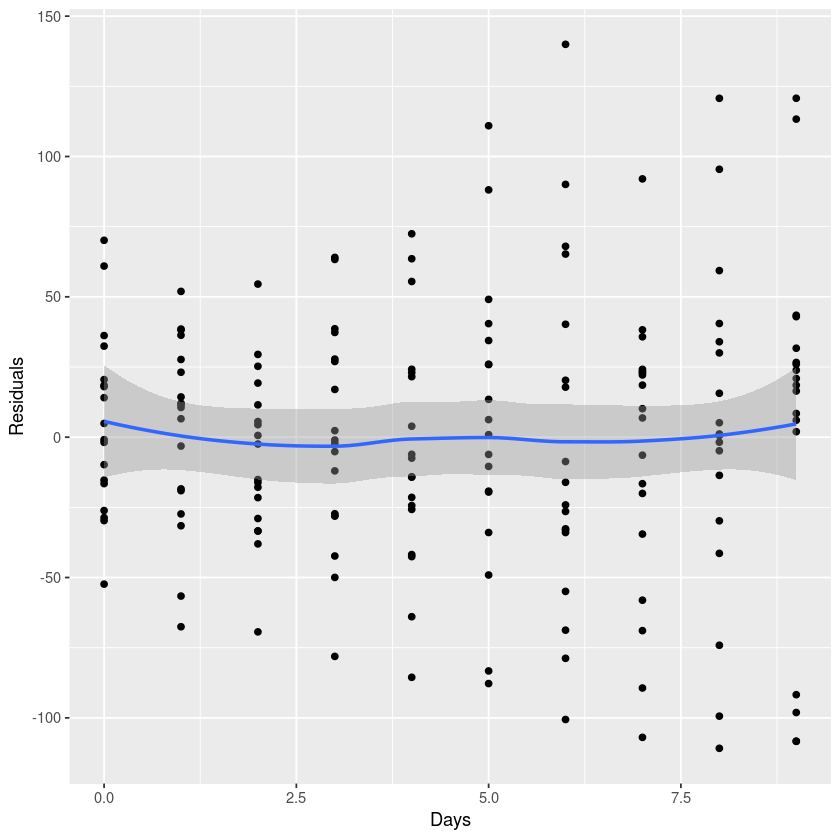

In [4]:
# residuals vs predicted with a nonparametric smoothing curve
print(ggplot(Y.plot, aes(x = Fitted, y = Residuals)) +
        geom_point() + geom_smooth())
# it can be useful to plot the residuals vs the predictor(s)
print(ggplot(Y.plot, aes(x = Days, y = Residuals)) +
        geom_point() + geom_smooth())

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 18 rows containing missing values (geom_point).”

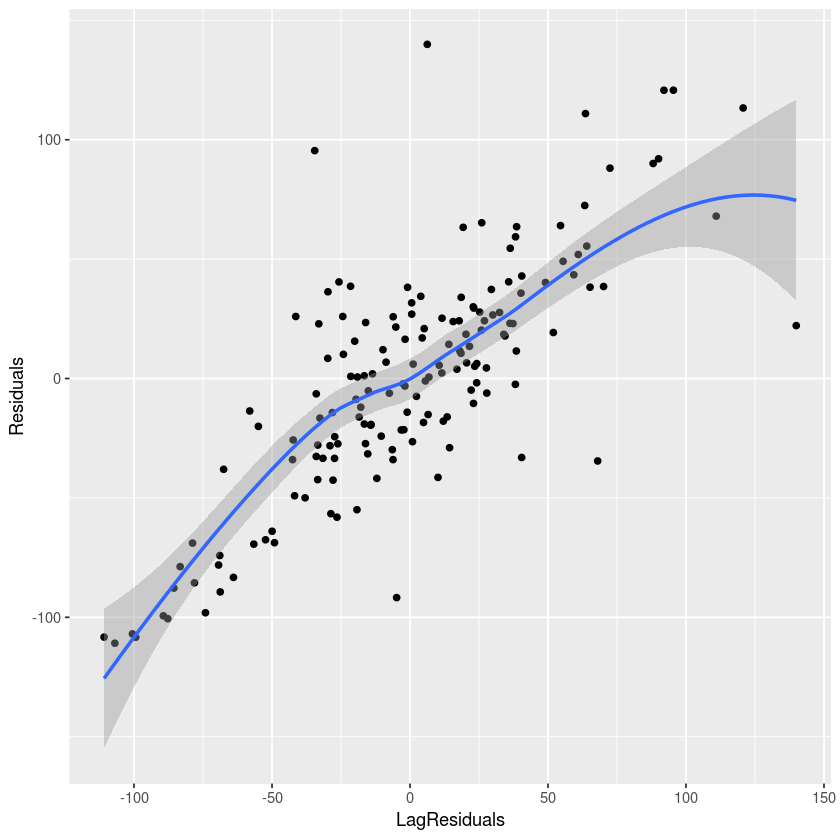

In [5]:
# independence. As the data were collected each day, I suspect serial correlation
Y.plot <- mutate(Y.plot, Subject = sleepstudy$Subject)
Y.plot <- Y.plot %>% group_by(Subject) %>% mutate(LagResiduals = lag(Residuals))
print(ggplot(Y.plot, aes(x = LagResiduals, y = Residuals)) +
        geom_point() + geom_smooth())
# Yup, this plot conforms a clear serial correlation

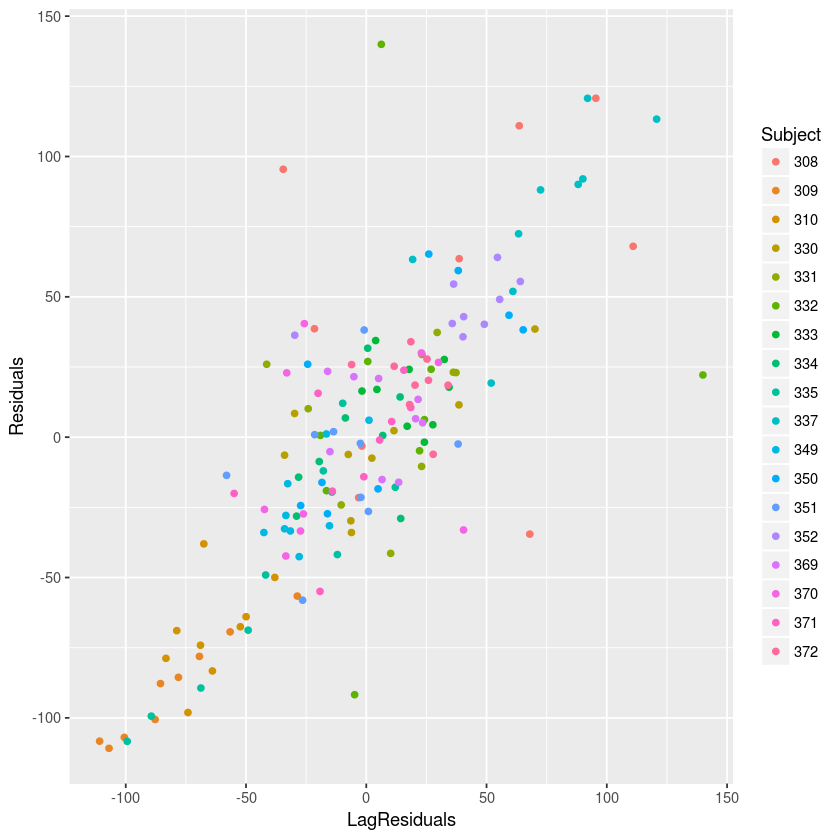

In [6]:
# for next plot I filter out "NA" values in LagResiduals to avoid warning messages
Y.plot <- Y.plot %>% filter(!is.na(LagResiduals))
# alternative plot labels each subject in a different color
print(ggplot(Y.plot, aes(x = LagResiduals, y = Residuals, group = Subject, color = Subject)) +
        geom_point())
# this plot shows that the serial correlation exists both within and between subjects